# 1. Tools for text processing

What are the most frequent words in Herman Melville's novel, Moby Dick, and how often do they occur?

In this notebook, we'll scrape the novel 'Moby Dick' from the website Project Gutenberg (which contains a large corpus of books) using the Python package *requests*. Then we'll extract words from this web data using *BeautifulSoup*. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit(*nltk*)

The *Data Science pipeline* we'll build in this notebook can be used to visualize the word frequency tools used here apply of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.

Let's start by loading in the three main Python packages we are going to use.

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

# 2. Request Moby Dick
To analyze Moby Dick, we need to get the contents of Moby Dick from *somewhere*. Luckily, the text is freely aavailable online at Project Gutenberg as an HTML file.
https://www.gutenberg.org/files/2701/2701-h/2701-h.htm.

**Note** that HTML stands for Hypertext Markup Language and is the standard markup language for the web.

To fetch the HTML file with Moby Dick we're going to use the *request* package to make a *GET* request for the website, that is we are getting data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into Python instead.

In [2]:
# Getting the Moby Dick HTML
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
html[:2000]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

# 3. Get the text from the HTML
This HTML is not quite what we want. However, it does contain what we want: the text of Moby Dick. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package *BeautifulSoup*.

Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a webpage. What Beautiful Soup does best is to make tag soup beautiful agian and to extract information from it with ease! In fact, the main object created and queried when using this package is called **BeautifulSoup**. After creating the soup, we can use its **.get_text()** method to extract the text.

In [3]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html,"xml")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
text[32000:34000]

' and see the watery part of\n      the world. It is a way I have of driving off the spleen and regulating the\n      circulation. Whenever I find myself growing grim about the mouth; whenever\n      it is a damp, drizzly November in my soul; whenever I find myself\n      involuntarily pausing before coffin warehouses, and bringing up the rear\n      of every funeral I meet; and especially whenever my hypos get such an\n      upper hand of me, that it requires a strong moral principle to prevent me\n      from deliberately stepping into the street, and methodically knocking\n      peoples hats offthen, I account it high time to get to sea as soon\n      as I can. This is my substitute for pistol and ball. With a philosophical\n      flourish Cato throws himself upon his sword; I quietly take to the ship.\n      There is nothing surprising in this. If they but knew it, almost all men\n      in their degree, some time or other, cherish very nearly the same feelings\n      towards the oce

# 4. Extract the words
We now have the text of the novel. There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.

Now that we have the text of interest, it's time to count how many times each words appears, and for this we'll use *nltk* - the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word(whitespace, punctuation,etc.) and then split the text into a list of words.

In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text=text)

# Printing out the first 8 words / tokens
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

# 5. Make the words lowercase

OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reasong, we should build a list of all words in Moby Dick in which all capital letters have been made lower case.

In [5]:
# A new list to hold the lowercased words
words = [token.lower() for token in tokens]

# Printing out the first 8 words/tokens
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

# 6. Load in stop words
It is commong practive to remove words that appear a lot in the English language such 'the', 'of' and 'a' because they're not so interesting. Such words are known as *stopwords*. The package **nltk** includes a good list of stop words in English that we can use.

In [6]:
# nltk.download('stopwords')

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
sw[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# 7. Remove stop words in Moby Dick

We now want to create a new list with all words in Moby Dick, except those that are stop words (that is, those words listed in sw). One way to get this list is to loop over all elements of *words* and add each word to a new list is thry are not in sw.

In [7]:
# A new list to hold Moby Dick with No Stop words
words_ns = [word for word in words if word not in sw]

# Printing the first 5 words_ns to check that stop words are gone
words_ns[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

# 8. We have the answer

Our Original question was :
        
        What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

We are now ready to answer that. Let's create a word frequency distribution plot using nltk.

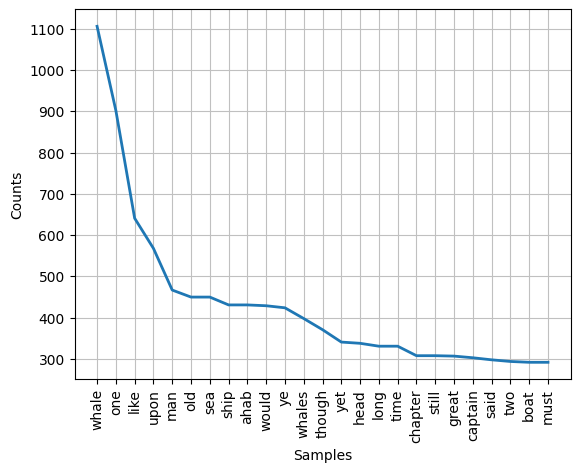

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
# Display figures inline
%matplotlib inline

# Creating word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

# 9. The most common word
The above frequency distribution plot above is the answer to our question.

#### What's the most common word in Moby Dick?

In [9]:
freqdist.max()

'whale'

In [10]:
freqdist['whale']

1106